In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
ESV_df = pd.read_table("../0. Data/resample_merged.grouped.filtered.otu-table.chname.txt")
ESV_df

,ID,UK01A,UK02A,UK03A,UK04A,UK05A,UK06A,UK08A,UK09A,UK10A,...,N52B,N52C,N52I,N52E,GZ100,GZ101,GZ102,GZ103,GZ104,N01A
0,ESV1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1,ESV2,1350,1663,1724,1603,1613,1696,1734,1084,1045,...,1411,1770,517,1936,0,0,0,0,0,176
2,ESV3,641,1124,1129,985,799,895,727,720,682,...,0,0,0,0,0,0,0,0,0,26
3,ESV4,0,0,0,0,0,0,0,0,0,...,0,32,77,48,0,30,0,0,0,0
4,ESV5,314,507,490,632,633,723,933,800,712,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37854,ESV37855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37855,ESV37856,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37856,ESV37857,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37857,ESV37858,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# 전체 샘플의 95% 이상에서 abundance=0인 ESV는 제거
esv_abundance = ESV_df.drop(columns=[' ID'])
esv_abundance = esv_abundance.T
esv_abundance


,0,1,2,3,4,5,6,7,8,9,...,37849,37850,37851,37852,37853,37854,37855,37856,37857,37858
UK01A,0,1350,641,0,314,592,1375,0,92,56,...,0,0,0,0,0,0,0,0,0,0
UK02A,0,1663,1124,0,507,751,2341,0,131,86,...,0,0,0,0,0,0,0,0,0,0
UK03A,0,1724,1129,0,490,920,2075,0,153,97,...,0,0,0,0,0,0,0,0,0,0
UK04A,0,1603,985,0,632,690,2665,0,146,81,...,0,0,0,0,0,0,0,0,0,0
UK05A,0,1613,799,0,633,873,2840,0,138,138,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GZ101,0,0,0,30,0,0,0,0,9,180,...,0,0,0,0,0,0,0,0,0,0
GZ102,0,0,0,0,0,0,0,0,33,157,...,0,0,0,0,0,0,0,0,0,0
GZ103,0,0,0,0,0,0,0,0,23,74,...,0,0,0,0,0,0,0,0,0,0
GZ104,0,0,0,0,0,0,0,0,0,90,...,0,0,0,0,0,0,0,0,0,0


In [5]:
zero_rate = (esv_abundance == 0).sum() / esv_abundance.shape[0]
selected_cols = zero_rate[zero_rate < 0.95].index
filtered_esv = esv_abundance[selected_cols]
filtered_esv

,0,1,2,3,4,5,6,7,8,9,...,35191,35192,35193,35194,35195,35197,35201,35207,35208,35218
UK01A,0,1350,641,0,314,592,1375,0,92,56,...,0,0,0,0,0,0,0,0,0,0
UK02A,0,1663,1124,0,507,751,2341,0,131,86,...,0,0,0,0,0,0,0,0,0,0
UK03A,0,1724,1129,0,490,920,2075,0,153,97,...,0,0,0,0,0,0,0,0,0,0
UK04A,0,1603,985,0,632,690,2665,0,146,81,...,0,0,0,0,0,0,0,0,0,0
UK05A,0,1613,799,0,633,873,2840,0,138,138,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GZ101,0,0,0,30,0,0,0,0,9,180,...,0,0,0,0,0,0,0,0,0,0
GZ102,0,0,0,0,0,0,0,0,33,157,...,0,0,0,0,0,0,0,0,0,0
GZ103,0,0,0,0,0,0,0,0,23,74,...,0,0,0,0,0,0,0,0,0,0
GZ104,0,0,0,0,0,0,0,0,0,90,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.decomposition import TruncatedSVD


# Truncated SVD: 차원 축소 (예: 200차원으로)
svd = TruncatedSVD(n_components=200, random_state=1004)
X_svd = svd.fit_transform(filtered_esv)


In [9]:
filtered_esv

,0,1,2,3,4,5,6,7,8,9,...,35191,35192,35193,35194,35195,35197,35201,35207,35208,35218
UK01A,0,1350,641,0,314,592,1375,0,92,56,...,0,0,0,0,0,0,0,0,0,0
UK02A,0,1663,1124,0,507,751,2341,0,131,86,...,0,0,0,0,0,0,0,0,0,0
UK03A,0,1724,1129,0,490,920,2075,0,153,97,...,0,0,0,0,0,0,0,0,0,0
UK04A,0,1603,985,0,632,690,2665,0,146,81,...,0,0,0,0,0,0,0,0,0,0
UK05A,0,1613,799,0,633,873,2840,0,138,138,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GZ101,0,0,0,30,0,0,0,0,9,180,...,0,0,0,0,0,0,0,0,0,0
GZ102,0,0,0,0,0,0,0,0,33,157,...,0,0,0,0,0,0,0,0,0,0
GZ103,0,0,0,0,0,0,0,0,23,74,...,0,0,0,0,0,0,0,0,0,0
GZ104,0,0,0,0,0,0,0,0,0,90,...,0,0,0,0,0,0,0,0,0,0


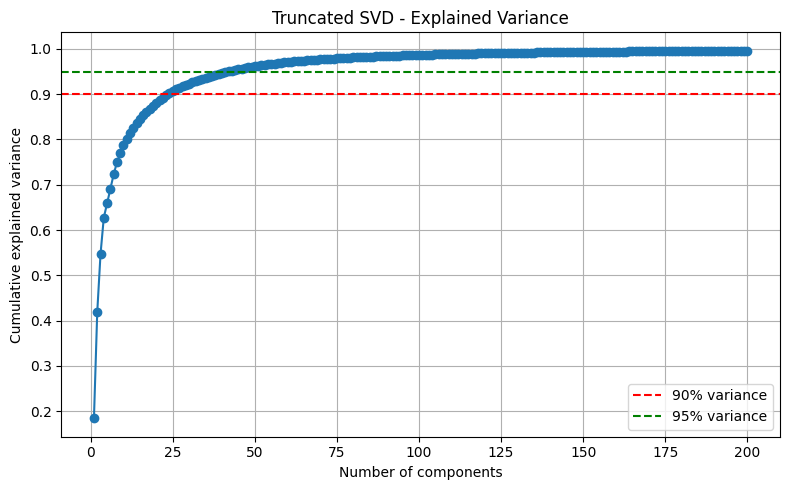

In [14]:
# 각 성분의 설명 분산 비율
explained_var_ratio = svd.explained_variance_ratio_

# 누적 설명 분산
cumulative_explained = np.cumsum(explained_var_ratio)

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained) + 1), cumulative_explained, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Truncated SVD - Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

25 차원으로 줄이기

In [33]:
svd = TruncatedSVD(n_components=25, random_state=1004)
X_svd = svd.fit_transform(filtered_esv)
X_svd.shape


(1243, 25)

In [1]:
# 차원 수 자동 추출
n_components = X_svd.shape[1]

# 컬럼명 생성: SVD_1, SVD_2, ...
svd_columns = [f"SVD_{i+1}" for i in range(n_components)]

# DataFrame으로 변환
X_svd_df = pd.DataFrame(X_svd, index=filtered_esv.index, columns=svd_columns)

# 결과 확인
X_svd_df

NameError: name 'X_svd' is not defined

In [38]:
X_svd_df.to_csv("../0. Data/ESV_SVD_25D.csv")

## Relative abundance

In [6]:


# 상대 풍부도 계산
relative_abundance_df = filtered_esv.div(filtered_esv.sum(axis=1), axis=0)

# 결과 확인
print(relative_abundance_df.head())

       0         1         2      3         4         5         6      7      \
UK01A    0.0  0.097762  0.046419    0.0  0.022739  0.042871  0.099573    0.0   
UK02A    0.0  0.071315  0.048201    0.0  0.021742  0.032205  0.100390    0.0   
UK03A    0.0  0.073343  0.048030    0.0  0.020846  0.039139  0.088275    0.0   
UK04A    0.0  0.067344  0.041381    0.0  0.026551  0.028988  0.111961    0.0   
UK05A    0.0  0.067793  0.033581    0.0  0.026604  0.036691  0.119363    0.0   

          8         9      ...  35191  35192  35193  35194  35195  35197  \
UK01A  0.006662  0.004055  ...    0.0    0.0    0.0    0.0    0.0    0.0   
UK02A  0.005618  0.003688  ...    0.0    0.0    0.0    0.0    0.0    0.0   
UK03A  0.006509  0.004127  ...    0.0    0.0    0.0    0.0    0.0    0.0   
UK04A  0.006134  0.003403  ...    0.0    0.0    0.0    0.0    0.0    0.0   
UK05A  0.005800  0.005800  ...    0.0    0.0    0.0    0.0    0.0    0.0   

       35201  35207  35208  35218  
UK01A    0.0    0.0    0.0

In [8]:
relative_abundance_df.to_csv("relative_abundance_table.csv")

In [12]:
esv_diff = filtered_esv.diff().dropna()
svd_diff = TruncatedSVD(n_components=100)
svd_diff.fit(esv_diff)
cum_var_diff = np.cumsum(svd_diff.explained_variance_ratio_)


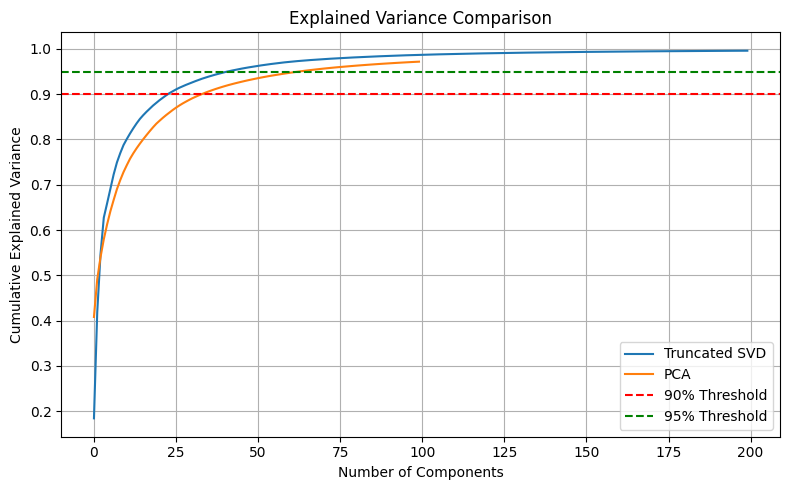

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained, label="Truncated SVD")
plt.plot(cum_var_diff, label="PCA")
plt.axhline(0.9, linestyle="--", color="red", label="90% Threshold")
plt.axhline(0.95, linestyle="--", color="green", label="95% Threshold")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
